In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\GIA DAT\ML Zoomcamp\2. Regression\car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset

In [4]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

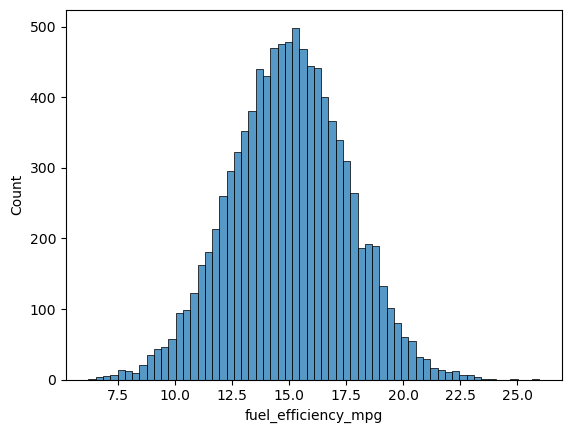

In [8]:
sns.histplot(df.fuel_efficiency_mpg)

It is already a normal distribution

In [10]:
# Question 1

In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [12]:
# Question 2
df.horsepower.median()

149.0

## Prepare and split the dataset

In [14]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [16]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train: n_train + n_val]
df_test = df.iloc[n_train + n_val: ]

In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [19]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]

In [20]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [21]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [22]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [23]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [24]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

In [25]:
# Question 3

In [26]:
## Train model with fill 0 to NA values

In [27]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [28]:
def prepare_X_0(df):
    df_new = df.fillna(0)
    X = df_new.values
    return X

In [29]:
def prepare_X_mean(df):
    df_new = df.fillna(df.horsepower.mean())
    X = df_new.values
    return X

In [30]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
# Train model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [32]:
X_train_0 = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train_0, y_train)

In [33]:
y_pred_train_0 = w0 + X_train_0.dot(w)

<Axes: ylabel='Count'>

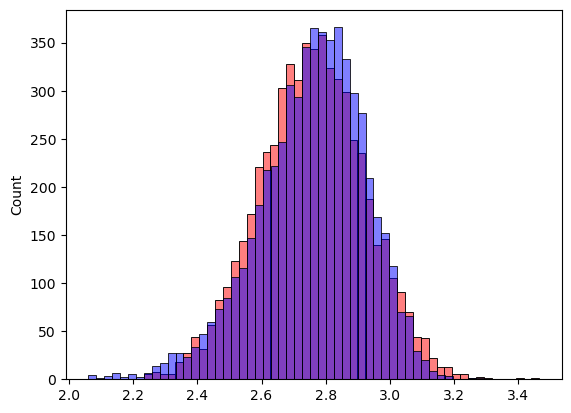

In [34]:
sns.histplot(y_pred_train_0, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

In [35]:
round(rmse(y_train, y_pred_train_0),2)

0.02

In [36]:
X_train_0 = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train_0, y_train)
X_val_0 = prepare_X_0(df_val)
y_pred_val_0 = w0 + X_val_0.dot(w)
round(rmse(y_val, y_pred_val_0),2)

0.02

In [37]:
rmse(y_train, y_pred_train_0)

0.019690785900442483

In [38]:
rmse(y_val, y_pred_val_0)

0.02267888949834529

In [39]:
X_train_mean = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0 + X_train_mean.dot(w)

<Axes: ylabel='Count'>

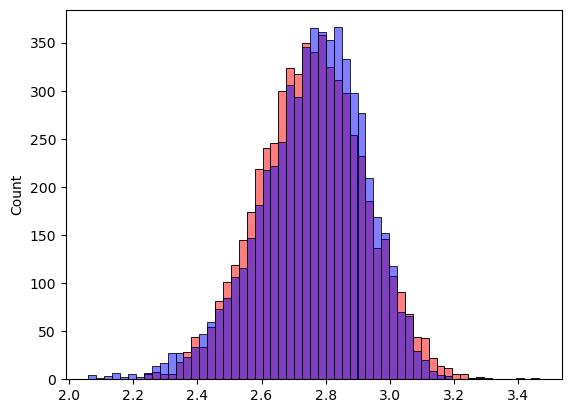

In [40]:
sns.histplot(y_pred_mean, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

In [41]:
round(rmse(y_train, y_pred_mean), 2)

0.02

In [42]:
# Question 4

In [43]:
## Train
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train)

## Validation
X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.02267888949834529

In [44]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [45]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    ## Train
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    ## Validation
    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 1.7938187907406462 0.02267888949834529
0.01 1.5440754978127718 0.02270686869560487
0.1 0.6853622472588152 0.023027888787950413
1 0.10451465403280469 0.023436112692210766
5 0.021984035809654856 0.02350374258480018
10 0.01109701919859992 0.02351052918873048
100 0.0011799994607635056 0.023547273431038004


In [46]:
## Train
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)
    
## Validation
X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
    
score = rmse(y_val, y_pred)
round(score,2)

0.02

In [47]:
# Question  5

In [48]:
score = list()
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Shuffle
    np.random.seed(i)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train: n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val: ]]
    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
    ## Train
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    ## Validation
    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score.append(rmse(y_val, y_pred))
round(np.std(score),3)

0.001

In [49]:
# Question 6

In [50]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
    
## Train
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train)
    
## Validation
X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.01886806523738217

In [51]:
# Set seed
np.random.seed(9)

# Split dataset
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val: ]]
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

# Combine train and valid dataset
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop = True)
X_full_train = prepare_X_0(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)
X_test = prepare_X_0(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.019547334530835278

In [52]:
df_test.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,127.0,3478.134427,2021,12.697174
1,140,96.0,2177.260466,2008,18.646416
2,250,183.0,3619.047343,2015,11.582334
3,230,111.0,2461.330265,2011,17.134683
4,200,140.0,3163.643227,2022,14.299495


In [53]:
car = df_test.iloc[4].to_dict()
df_small = pd.DataFrame([car])
X_small = prepare_X_0(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
np.expm1(y_pred)

14.09076842390626

In [54]:
np.expm1(y_test[4])

14.299495429945205